In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data info
>
Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.



# My project steps
1) **Impoting data**<br>
2) **Data analytics**<br>
>- checking for missing values<br>
>- checking for outliers<br>
>- checking relationshib between dependent and independent variables
>- checking for distributions
>- checking for categorical variables<br>
>- model suitability<br>

3)**Data preprocessing**<br>
>- Dealing with missing values<br>
>- Dealing with outliers  (according to the model suitability)<br>
>- Scaling (if required)<br>
>- feature selection<br>

4) **Model deployment**<br>

5)**model evaluation**<br>



### 1) Impoting data

In [2]:
data=pd.read_table('airfoil_self_noise.dat',header=None)
data

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [4]:
columns=['Frequency(Hz)','Angle of attack(degree)','Chord length(m)','Free-streem velocity(m/s)','suction_thick(m)','scaled_sound_pressure(db)']
data.columns=columns

In [5]:
data

,Frequency(Hz),Angle of attack(degree),Chord length(m),Free-streem velocity(m/s),suction_thick(m),scaled_sound_pressure(db)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


### 2) Data analytics

 - **checking missing values**

In [6]:
df=data.copy()
df.isna().sum()

Frequency(Hz)                0
Angle of attack(degree)      0
Chord length(m)              0
Free-streem velocity(m/s)    0
suction_thick(m)             0
scaled_sound_pressure(db)    0
dtype: int64

>We can observe that data contain no missing values 

- **checking for outliers**

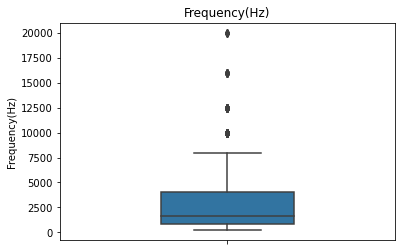

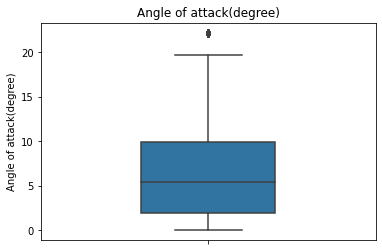

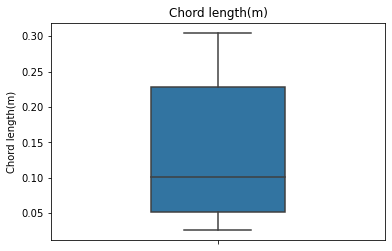

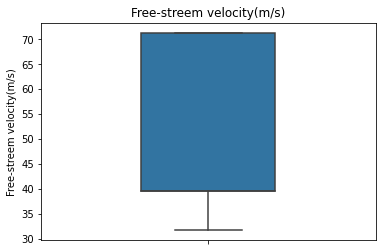

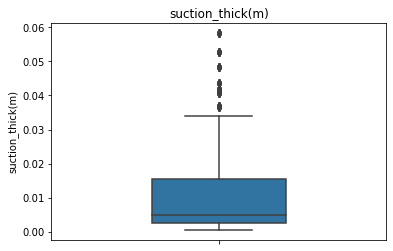

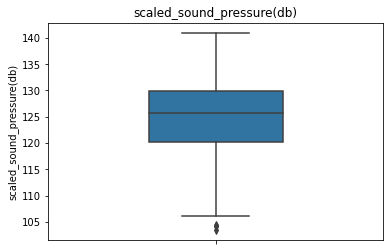

In [7]:
import seaborn as sns
for feature in df.columns:
    sns.boxplot(df[feature],orient='v',width=0.4)
    plt.title(feature)
    plt.show()

>There are outliers in the column namely  'frequency(Hz)', 'Angle of attack(degree)', 'Suction thick(m)' and in dependent variable too

- **checking relationshib between dependent and independent variables**

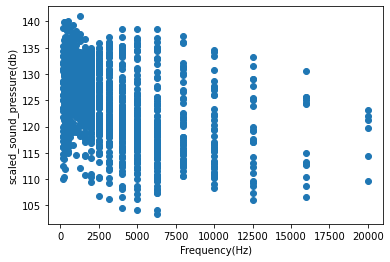

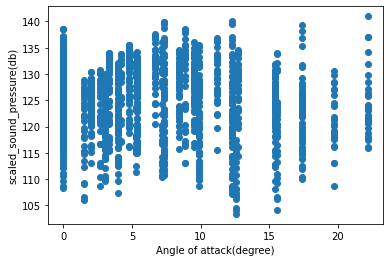

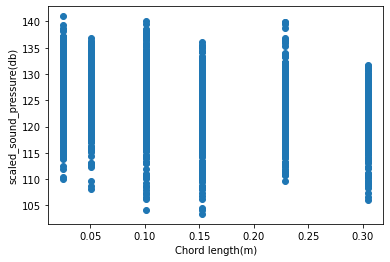

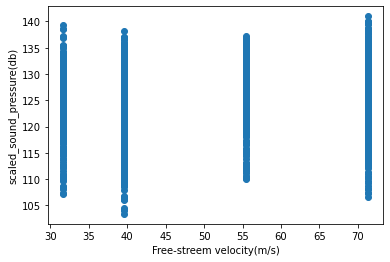

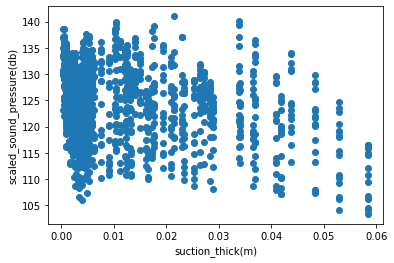

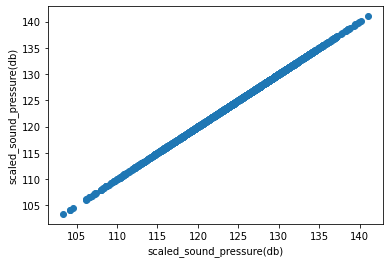

In [8]:
for feature in df.columns:
    plt.scatter(df[feature],df['scaled_sound_pressure(db)'])
    plt.xlabel(feature)
    plt.ylabel('scaled_sound_pressure(db)')
    plt.show()

In [9]:
df.corr()

,Frequency(Hz),Angle of attack(degree),Chord length(m),Free-streem velocity(m/s),suction_thick(m),scaled_sound_pressure(db)
Frequency(Hz),1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack(degree),-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length(m),-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-streem velocity(m/s),0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
suction_thick(m),-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
scaled_sound_pressure(db),-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


>From above plots and correlation matrix we can colclude that there is no linier relationship between dependent and independent features

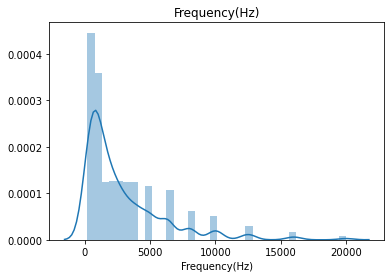

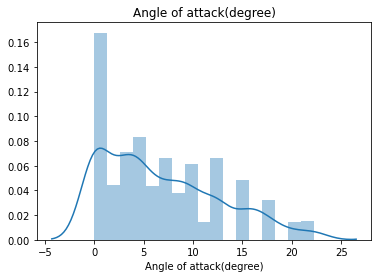

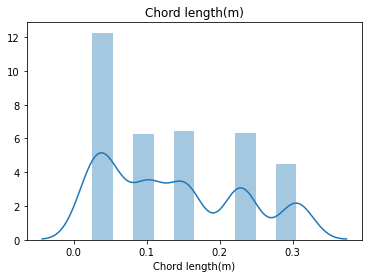

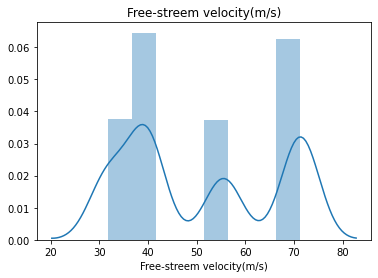

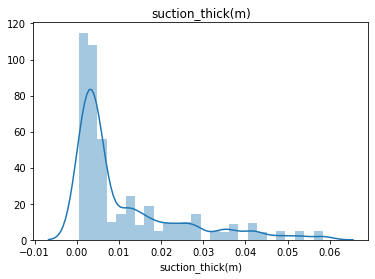

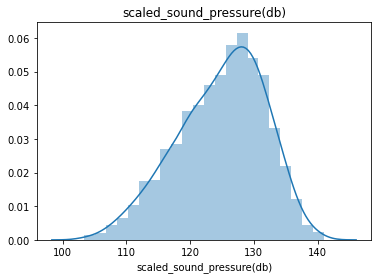

In [10]:
for feature in df.columns:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show()

> Data in not drawn from normal distribution

Lets see effect of chord length and free stram velocity

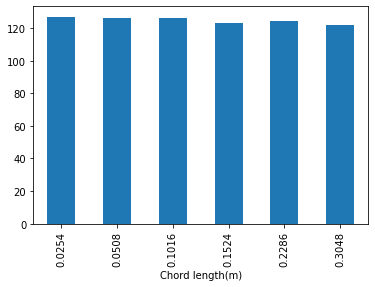

In [11]:
df.groupby('Chord length(m)')['scaled_sound_pressure(db)'].mean().plot(kind='bar')

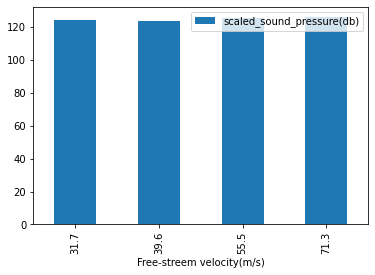

In [12]:
df.groupby('Free-streem velocity(m/s)').agg({'scaled_sound_pressure(db)':np.mean}).plot(kind='bar')

- checking for categorical variables

> There are no categorical variables

Q) Model suitability?
>- Since there is no linear relationship between dependent and independent variables we cant apply linear regression and support vector regressor
>- So lets try with all supervised regressors and will the best one a)linear regression b) knn regressor c) support vector regressor d) Decision tree regressor  e) Random forest regressor f)Ada boost g)Gradient boost and xgboost   and will select the best suitable model

## 3) Data preprocessing

 - dealing with outliesrs

In [13]:
mean=df['scaled_sound_pressure(db)'].mean()
std=df['scaled_sound_pressure(db)'].std()
lo_lim=mean-3*std
up_lim=mean+3*std
df1=df[(df['scaled_sound_pressure(db)']>lo_lim)  & (df['scaled_sound_pressure(db)']<up_lim)]
df1.shape

(1501, 6)

> only two  points are outliers

- scaling
> it is model specific not all model needs scaling so we will apply scaling wherever required

- Feature selection
> it is model specific not all model needs feature selection so we will apply  wherever required

In [14]:
dt=df1.copy()

In [15]:
x=dt.drop('scaled_sound_pressure(db)',axis=1)
y=dt['scaled_sound_pressure(db)']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

#### a) Linear regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

#### <font color=red>scaling is required in linear regression<fonts/>

>###  scaling required

In [18]:
scale=MinMaxScaler()
scale.fit(x_train)
x_train_scale=scale.transform(x_train)
x_test_scale=scale.transform(x_test)


In [19]:
reg=LinearRegression()
reg.fit(x_train_scale,y_train)
print('Test score' ,reg.score(x_test_scale,y_test))
print('Training score',reg.score(x_train_scale,y_train))
y_pred_reg=reg.predict(x_test_scale)
print('Mean squared error',mean_squared_error(y_test,y_pred_reg))


Test score 0.5388244453387069
Training score 0.49037051168844414
Mean squared error 23.60570949290908


In [20]:
print(x_test.shape)
print(y_test.shape)

(451, 5)
(451,)


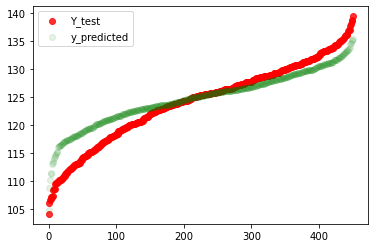

In [21]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_reg)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()

><font color=blue>**So Linear regressor performance is not up to the mark for the given dataset because dataset not showing any linear relationship between dependent and independent variables**<fonts/>

##### b) Knn regressor

>#####  scaling required

In [22]:
from sklearn.neighbors import KNeighborsRegressor
param={'n_neighbors':np.arange(1,40)}
knn=KNeighborsRegressor()
grid_cv=GridSearchCV(knn,param,cv=5)
# neigh = KNeighborsRegressor(n_neighbors=2)
grid_cv.fit(x_train_scale,y_train)
y_pred_knn=grid_cv.predict(x_test_scale)
print('Test score' ,grid_cv.score(x_test_scale,y_test))
print('Training score',grid_cv.score(x_train_scale,y_train))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))


Test score 0.8208357020200565
Training score 1.0
Mean squared error 9.17069503547672


>#### It is a over fitted  model 

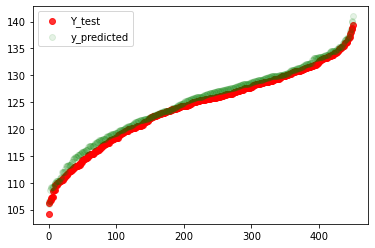

In [23]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_knn)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()


><font color=blue>**Knn regressor performance better  than linear regressor  because whenever ther is more overlap knn performs better and its takes the mean of surrounding k points and give as response variable**<fonts/>

### c) support vector regressor

>#### scaling required

In [24]:
from sklearn.svm import SVR

In [41]:
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly']} 
svr=SVR()
grid_svr=GridSearchCV(svr,params,cv=5)
grid_svr.fit(x_train_scale,y_train)
print(grid_svr.best_params_)
print('Best score',grid_svr.best_score_)
y_pred_svr=grid_svr.predict(x_test)

print('Test score' ,grid_svr.score(x_test_scale,y_test))
print('Training score',grid_svr.score(x_train_scale,y_train))
print('Mean squared error',mean_squared_error(y_test,y_pred_svr))


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best score 0.7306585474222296
Test score 0.8079965097289196
Training score 0.7970441039711051
Mean squared error 235.86467493299742


>#####  Something fitious Here we are getting good score as compared to linear regression model but mean squared error is high?

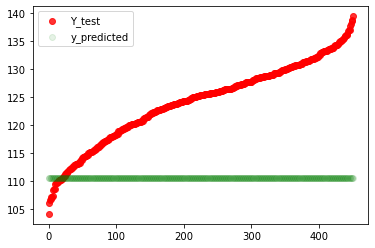

In [42]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_svr)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()

#### d) Decision tree regressor

> No scaling required

In [27]:
from sklearn.tree import DecisionTreeRegressor

# make an array of depths to choose from, say 1 to 20
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]

param_grid = {"max_depth": range(1,20)}
tree= DecisionTreeRegressor()
grid_tree=GridSearchCV(tree,param_grid, cv=10)
grid_tree.fit(x_train,y_train)
y_pred_tree=grid_tree.predict(x_test)



print('Best score',grid_tree.best_score_)


print('Test score' ,grid_tree.score(x_test,y_test))
print('Training score',grid_tree.score(x_train,y_train))
print('Mean squared error',mean_squared_error(y_test,y_pred_tree))

Best score 0.8298969621166654
Test score 0.8789332014140748
Training score 0.9999801140662139
Mean squared error 6.196919259423506


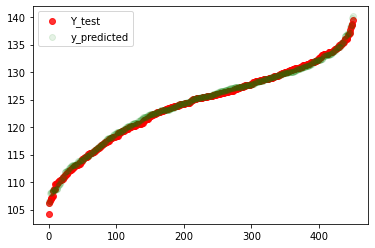

In [28]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_tree)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()

>### Decision tree performance is goof for this given dataset

In [29]:
sklearn.metrics.SCORERS.keys()   # to check all scoring metrix

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Lets try with ensemble techniques

### i) Random forest

>#### no scaling required

In [30]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {"max_depth": range(1,20)}

rand_forest=RandomForestRegressor()
grid_rand_forest=GridSearchCV(rand_forest,param_grid,cv=10)
grid_rand_forest.fit(x_train,y_train)


y_pred_rand_forest=grid_rand_forest.predict(x_test)

print('Best score',grid_rand_forest.best_score_)


print('Test score' ,grid_rand_forest.score(x_test,y_test))
print('Training score',grid_rand_forest.score(x_train,y_train))
print('Mean squared error',mean_squared_error(y_test,y_pred_rand_forest))    

Best score 0.912733181445445
Test score 0.9367686868212609
Training score 0.988535202387048
Mean squared error 3.2365549185466103


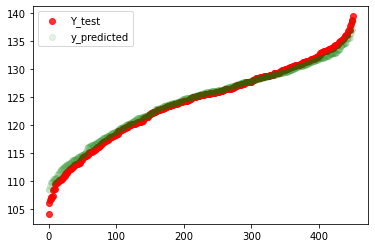

In [31]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_rand_forest)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()

>#### So performance of random forest is also best suited for this given data

### ii)Adaboost

In [32]:
from sklearn.ensemble import AdaBoostRegressor

grid_search_ABC = AdaBoostRegressor(DecisionTreeRegressor(max_depth=15))

grid_search_ABC.fit(x_train,y_train)


y_pred_adaboost=grid_search_ABC.predict(x_test)


print('Test score' ,grid_search_ABC.score(x_test,y_test))
print('Training score',grid_search_ABC.score(x_train,y_train))
print('Mean squared error',mean_squared_error(y_test,y_pred_adaboost)) 



Test score 0.918889983517795
Training score 0.9992101561515595
Mean squared error 4.151693355581702


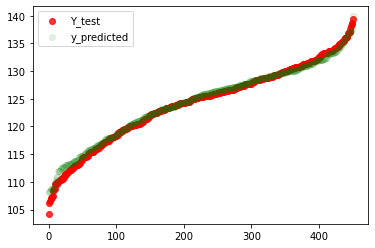

In [33]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_adaboost)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()

>#### Adaboost also performs well for this dataset

### iii) Gradient boost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = AdaBoostRegressor()

grad_boost.fit(x_train,y_train)


y_pred_gradboost=grad_boost.predict(x_test)


print('Test score' ,grad_boost.score(x_test,y_test))
print('Training score',grad_boost.score(x_train,y_train))
print('Mean squared error',mean_squared_error(y_test,y_pred_gradboost)) 

Test score 0.7092999056940099
Training score 0.6933948472034301
Mean squared error 14.87976087715307


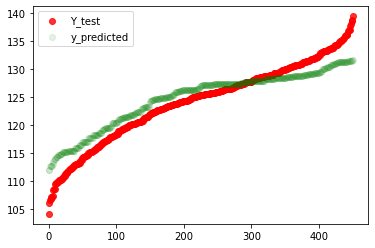

In [35]:
x_line=[i for i in range(len(y_test))]
y_test_=sorted(y_test)
y_pred_=sorted(y_pred_gradboost)
plt.scatter(x_line,y_test_,color='r',alpha=0.8,label='Y_test')
plt.scatter(x_line,y_pred_,color='g',alpha=0.1,label='y_predicted')
plt.legend()

>#### GradientboostRegressor shows average performance  for this dadaset

#### <font color=red>Lets compare all model performances using pi chart<fonts/>

In [36]:
training_score=[reg.score(x_train_scale,y_train),grid_cv.score(x_train_scale,y_train),grid_svr.score(x_train_scale,y_train),grid_tree.score(x_train,y_train),grid_rand_forest.score(x_train,y_train),grid_search_ABC.score(x_train,y_train),grad_boost.score(x_train,y_train)]
testing_score=[reg.score(x_test_scale,y_test),grid_cv.score(x_test_scale,y_test),grid_svr.score(x_test_scale,y_test),grid_tree.score(x_test,y_test),grid_rand_forest.score(x_test,y_test),grid_search_ABC.score(x_test,y_test),grad_boost.score(x_test,y_test)]
error=[]
label=['Linear regression','Knn','SVR','Decision Tree','Random forest','Adaboost','GradientBoost']
training_score

[0.49037051168844414,
 1.0,
 0.7970441039711051,
 0.9999801140662139,
 0.988535202387048,
 0.9992101561515595,
 0.6933948472034301]

In [37]:
training_score=list(map(lambda x:round(100*x,2),training_score))
training_score

[49.04, 100.0, 79.7, 100.0, 98.85, 99.92, 69.34]

In [38]:
testing_score=list(map(lambda x:round(100*x,2),testing_score))
testing_score

[53.88, 82.08, 80.8, 87.89, 93.68, 91.89, 70.93]

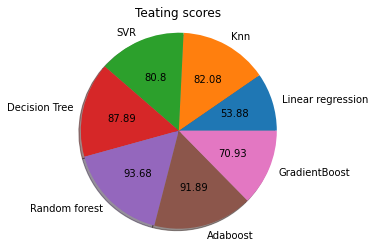

In [39]:

p, tx, autotexts = plt.pie(testing_score, labels=label,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(testing_score[i]))
plt.title('Teating scores')   
plt.axis('equal')
plt.show()

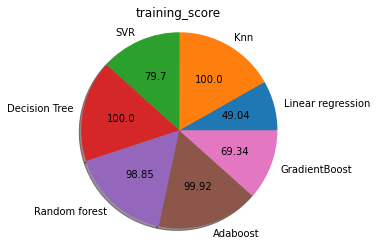

In [40]:

p, tx, autotexts = plt.pie(training_score, labels=label,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(training_score[i]))
plt.title('training_score')    
plt.axis('equal')
plt.show()

## <font color=red>Final Thoughts<fonts/>

**So finally whenever we dont know much about data its good to fit random forest which need no feature engineering<br>
For the present dataset knn , Decision tree,Random forest and adaboost performse well<br>
Finally i will go with Random forest whose performance is good for both training as well testing dataset**